In [105]:
import numpy as np

def minidistance(S1, S2) :
    N = len(S1)
    M = len(S2)
    matrix = np.zeros((N + 1, M + 1), dtype=int) #Build an alignment matrix
    matrix[0][0] = 0
    
    for i in range(1, N+1):
        matrix[i][0] = matrix[0][0] + i # left sequence, S1

    for j in range(1, M+1):
        matrix[0][j] = matrix[0][0] + j  # top sequence, S2
       
    for i in range (1, N+1):
        for j in range (1, M+1):                    
            c = 0
            if S1[i-1] != S2[j-1]:
                c = 1                
            matrix[i][j] = min(matrix[i-1][j]+1, matrix[i][j-1]+1, matrix[i-1][j-1]+c)

#     print(matrix)
    return matrix[-1][-1]



In [106]:
# minidistance('ATCGGGACTTATCGC','ACCGGGTCTTACGC')
minidistance('AACCGGG','AACDGGG')


1

In [107]:
file = open("two.fasta", "r")

seq = []
i = 0
for line in file:    
    i += 1
    if i % 2 == 0:
        seq.append(line)
        

print(seq)

minidistance(seq[0], seq[1])

['ATCGGGACTTATCGC\n', 'ACCGGGTCTTACGC\n']


3

In [119]:

def read_data(filename):
    file = open(filename, "r")
    seq_list = []
    key = ''
    currentSeq = ''
    for line in file:    
        if line[0] == '>':
            if currentSeq:
                seq_list.append((key, currentSeq))
                currentSeq = ''            
            key = line.rstrip()
        else:
            currentSeq += line.rstrip()
    
    # put the last seq and key into seq_list
    seq_list.append((key, currentSeq))        

    return seq_list


In [120]:

# data_1 = read_data("small.fasta")
# # print the first 4 line
# print(data_1[:4])

# data_2 = read_data("big.fasta")
# print(data_2[-4:])

[('>A0A0D4CKV1_LACMC/139-404', 'VDAKNFNHYFDMHGTATDQLNSDGSVTITFTKKGQQYSAGGISLKEKINMDSSFTLNGQINLGNFGGADGMGIVFHTGNVAALGRPGGNLGIAGLPDAVGFKLDSYYDYYNEPTSSLPGDQIPLPQNGEDDSKYGQSQDPTMAVPCGDIVTTSHEQVTTTTGKKAWRWWVNNQDGTVQPLTTSLMDGRFHDFQMQYNGQTHVLTIRLKEPAGHLNDSVQTHEDEQWVTWTYQIPDIPGNGNVAMALDLAATTGELTNLQQFRLTSF'), ('>F9UN23_LACPL/271-511', 'VDKDNFLKYFSLNGSATYDAKTGIVTITPNQNNQVGNFSLTSKIDMNKSFTLTGQVNLGSNPNGADGIGFAFHSGNTTDVGNAGGNLGIGGLQDAIGFKLDTWFNSYQAPSSDKNGSEISSTNSNGFGWNGDSANAPYGTFVKTSNQEISTANGSKVQRWWAQDTGESQALSKADIDGNFHDFVVNYDGATRTLTVSYTQASGKVLTWKTTVDSSYQAMAMVVSASTGAAKNLQQFKLTSF'), ('>G8PFB6_PEDCP/251-492', 'VTKDNFLQYFSLNGSATYDQSTGIVTITPDDNNQVGNFALKSKIDTNSSFTLTGQVNLGSDPNGADGISFAFHDGNTTDLGNSGGNLGIGGLLDALGFKLDTWGNGYRAPSSDKDGSQIDPTNSNDFGWNDDSMSAPYGTFVTTSDEQIKSQDGTSVQRWWAKDVAGSAQALSTSDVDGQFHDFTVHYDGTTRTVTVSYKQTDGTVLTWSQQVADSYQAVAFIVSASTGGAKNLQQFKLTSF'), ('>A0A0J5PEP6_9LACT/242-454', 'VTKDNFLQWFKINGAATYDTNTNTAILTTNKDFVEGNITLNTKINANDAFVLNGKINLGNKLQGAQGGDGIGIAFHHGSVGQIGSVGGGISVMGLPTSTGFIFDTWTLNAGDHGDGKGDSYV

In [240]:

def get_pairwise_dist_matrix(data_set):    
    data_len = len(data_set)    
    ret = np.zeros(data_len*data_len).reshape(data_len, data_len)
    for i in range(data_len-1):
        print(i)
        for j in range(i+1, data_len):
            (key_1, seq_1) = data_set[i]
            (key_2, seq_2) = data_set[j]
#             print(i, j)
        #     print(seq_1, '|||||', seq_2)
        #     print("-------")
            dist = minidistance(seq_1, seq_2)
            ret[i][j] = dist
            ret[j][i] = dist
        
    return ret
    

In [241]:
sample_data = data_1[:20]
dist_matrix = get_pairwise_dist_matrix(sample_data)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [242]:
dist_matrix

array([[  0., 154., 150., 181., 215., 218., 201., 194., 197., 197., 189.,
        195., 196., 206., 205., 225., 211., 209., 188., 197.],
       [154.,   0.,  64., 159., 196., 193., 180., 174., 174., 181., 178.,
        179., 170., 191., 183., 202., 186., 201., 171., 174.],
       [150.,  64.,   0., 154., 198., 196., 182., 176., 177., 187., 180.,
        183., 172., 189., 192., 208., 190., 194., 166., 170.],
       [181., 159., 154.,   0., 187., 190., 166., 180., 175., 168., 162.,
        162., 157., 182., 181., 195., 165., 196., 164., 162.],
       [215., 196., 198., 187.,   0., 210., 198., 207., 198., 199., 190.,
        190., 186., 194., 196., 211., 201., 206., 191., 182.],
       [218., 193., 196., 190., 210.,   0., 172., 164., 163., 167., 192.,
        188., 189., 203., 202., 206., 184., 209., 195., 192.],
       [201., 180., 182., 166., 198., 172.,   0., 156., 145., 142., 167.,
        170., 169., 186., 191., 205., 171., 195., 183., 173.],
       [194., 174., 176., 180., 207., 164

In [211]:
# We use hierarchy to cluser the data
from scipy.cluster.hierarchy import dendrogram, linkage
# http://scipy.github.io/devdocs/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/




In [212]:
Z = linkage(dist_matrix)


In [251]:
[data[0] for data in sample_data]

['>A0A0D4CKV1_LACMC/139-404',
 '>F9UN23_LACPL/271-511',
 '>G8PFB6_PEDCP/251-492',
 '>A0A0J5PEP6_9LACT/242-454',
 '>S0PFG1_9ENTE/51-310',
 '>A0A0X8FKW5_9LACT/74-322',
 '>H0DJD4_9STAP/286-501',
 '>X1WMZ8_ACYPI/302-540',
 '>SASG_STAA8/165-389',
 '>Q5HKE8_STAEQ/355-578',
 '>A9FW66_SORC5/76-274',
 '>S4XNL3_SORCE/173-371',
 '>B4WRJ0_SYNS7/175-379',
 '>D7UXE8_LISGR/235-466',
 '>W7CS95_9LIST/217-449',
 '>A0A0R2HZY0_CARDV/195-455',
 '>F3Y7V7_MELPT/2-179',
 '>V6Q5A0_9ENTE/177-432',
 '>A0A172T726_9DEIO/567-785',
 '>A0A0B4XK64_9GAMM/395-609']

Text(0, 0.5, 'distance')

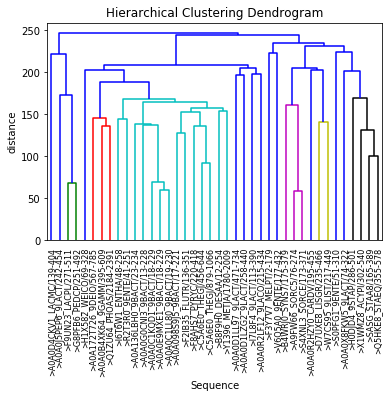

In [213]:
import matplotlib.pyplot as plt

labels = [data[0] for data in sample_data]

plt.figure()
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=labels,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sequence')
plt.ylabel('distance')


In [243]:
dist_matrix[10,:]
labels

['>A0A0D4CKV1_LACMC/139-404',
 '>F9UN23_LACPL/271-511',
 '>G8PFB6_PEDCP/251-492',
 '>A0A0J5PEP6_9LACT/242-454',
 '>S0PFG1_9ENTE/51-310',
 '>A0A0X8FKW5_9LACT/74-322',
 '>H0DJD4_9STAP/286-501',
 '>X1WMZ8_ACYPI/302-540',
 '>SASG_STAA8/165-389',
 '>Q5HKE8_STAEQ/355-578',
 '>A9FW66_SORC5/76-274',
 '>S4XNL3_SORCE/173-371',
 '>B4WRJ0_SYNS7/175-379',
 '>D7UXE8_LISGR/235-466',
 '>W7CS95_9LIST/217-449',
 '>A0A0R2HZY0_CARDV/195-455',
 '>F3Y7V7_MELPT/2-179',
 '>V6Q5A0_9ENTE/177-432',
 '>A0A172T726_9DEIO/567-785',
 '>A0A0B4XK64_9GAMM/395-609',
 '>Q1ZU64_PHOAS/2184-2391',
 '>A0A0E9MXE1_9BACT/18-229',
 '>A0A0C1LL80_9BACT/19-230',
 '>A0A0C1KQD1_9BACT/18-229',
 '>A0A0G0CNI3_9BACT/13-228',
 '>A0A136LBH0_9BACT/23-234',
 '>B8F9H0_DESAA/12-254',
 '>Y1396_METJA/1780-2009',
 '>F8AHS7_PYRYC/220-418',
 '>C5A6E0_THEGJ/456-644',
 '>C5A6E0_THEGJ/879-1066',
 '>A0A098S9J5_9BACT/17-221',
 '>F2IB35_FLUTR/136-351',
 '>I6T6W1_ENTHA/48-258',
 '>R2T3R0_9ENTE/41-251',
 '>H1X582_WEICO/69-328',
 '>A0A0D1LL97_9LACT/471-734',

[[ -69.5873      50.566853 ]
 [  14.573143   -26.23214  ]
 [   2.3705318   54.726562 ]
 [ -47.073368   -59.89967  ]
 [ -35.029873    74.86368  ]
 [ -25.50788   -100.49312  ]
 [ -67.14034    -28.601004 ]
 [-109.93236    -15.048022 ]
 [-107.45712     28.504818 ]
 [  19.46085    -87.833694 ]
 [  -9.155112   -55.445816 ]
 [ -65.41918      8.352246 ]
 [ -73.33739    -94.49879  ]
 [ -27.636457   -17.016047 ]
 [  49.16021    -52.56472  ]
 [-100.3701     -57.82482  ]
 [ -30.211756    24.631512 ]
 [   6.503756    10.843428 ]
 [  53.905094    -5.61236  ]
 [  42.680256    38.590126 ]]


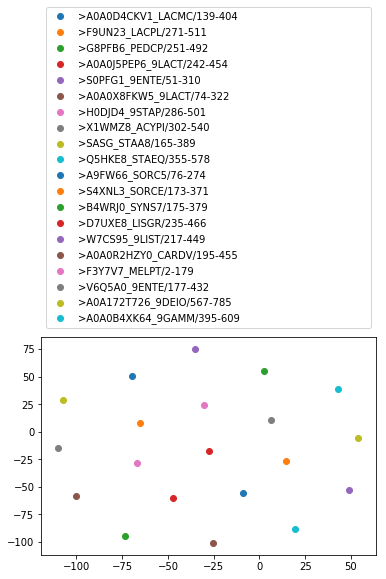

In [252]:
from sklearn.manifold import TSNE
dr_data = TSNE(n_components=2).fit_transform(dist_matrix)
print(dr_data)

plt.figure()
for i in range(len(sample_data)):
    x = dr_data[i][0]
    y = dr_data[i][1] 
    plt.scatter(x, y, label=sample_data[i][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand")
# plt.savefig('a.png')